<a href="https://colab.research.google.com/github/arpit4101/Machine-Learning-Concepts/blob/main/K-Nearest%20Neighbour%20(KNN)/K_nearest_neighbour_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
df.shape

(569, 33)

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [4]:
df.shape

(569, 31)

In [5]:
df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X.shape
y.shape

(569,)

In [7]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [9]:
X_train.shape

(455, 30)

In [10]:
from sklearn.preprocessing import StandardScaler

columns = X_train.columns

sc = StandardScaler()
sc.fit(X_train, y_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [12]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.403811,1.792834,1.379601,1.342225,0.330349,0.705630,1.229423,1.176285,0.260292,-0.153258,...,1.496821,1.733735,1.512809,1.421610,1.965576,0.765781,1.399530,1.044121,0.522960,0.649908
1,1.165655,-0.144612,1.071214,1.071068,-0.820808,-0.412695,-0.119237,0.202709,-0.726151,-1.239839,...,1.008308,0.140997,0.913198,0.886000,-0.469582,-0.105030,0.349682,0.594078,0.441538,-0.852815
2,-0.030728,-0.772711,-0.098222,-0.130408,-0.913644,-0.887366,-0.685403,-0.523048,-0.399677,-0.593357,...,-0.136960,-0.657041,-0.192879,-0.239804,-0.642887,-0.849211,-0.797285,-0.640476,-0.311617,-0.692928
3,0.591279,0.652592,0.620807,0.472287,1.365820,0.392012,1.080400,0.750693,0.144446,0.273173,...,0.282634,-0.051000,0.170962,0.144334,0.383612,-0.310257,0.257773,-0.189386,-0.294393,-0.304554
4,0.949914,0.034155,0.929193,0.821157,-0.549444,0.235203,0.148394,0.626025,-1.129855,-1.149632,...,0.827903,0.054181,0.921931,0.594315,0.183645,0.503165,0.335470,1.144297,0.006243,-0.351007


In [13]:
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = KNeighborsClassifier(n_neighbors=2)
k.fit(X_train,y_train)

print('Acuracy Score : ', accuracy_score(y_test, k.predict(X_test)))

Acuracy Score :  0.9649122807017544


# Experimental method to find the optimum value of k where model performs the best

In [15]:
np.sqrt(455)

np.float64(21.330729007701542)

In [16]:
score = []

for i in range(1,21):

  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train,y_train)
  current_score = accuracy_score(y_test,kn.predict(X_test))
  score.append(current_score)

In [17]:
x = list(range(1,21))
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

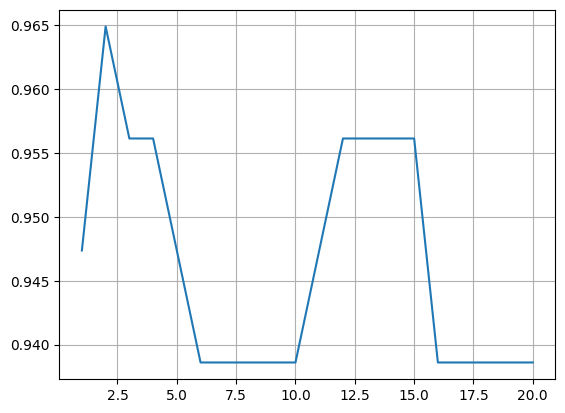

In [18]:
import matplotlib.pyplot as plt
plt.plot(x,score)
plt.grid()

# Tool for visualization and understanding how change in k value changes the decision surface

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…